In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.41062 stdev: 0.20116
Best fitness: 0.94778 - size: (2, 7) - species 8 - id 89
Average adjusted fitness: 0.398
Mean genetic distance 2.942, standard deviation 0.498
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54445 stdev: 0.24023
Best fitness: 0.96583 - size: (2, 7) - species 7 - id 339
Average adjusted fitness: 0.498
Mean genetic distance 3.064, standard deviation 0.497
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 4.819 sec (4.917 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57381 stdev: 0.25136
Best fitness: 0.97743 - size: (4, 10) - species 23 - id 445
Average adjusted fitness: 0.514
Mean genetic distance 3.065, standard deviation 0.495
Population of 199 members in 42 species
Total extinction

Population's average fitness: 0.53170 stdev: 0.10144
Best fitness: 0.97196 - size: (3, 9) - species 4 - id 828
Average adjusted fitness: 0.454
Mean genetic distance 3.127, standard deviation 0.525
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 5.836 sec (6.974 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53152 stdev: 0.10847
Best fitness: 0.97196 - size: (3, 9) - species 4 - id 828
Average adjusted fitness: 0.475
Mean genetic distance 3.119, standard deviation 0.524
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 5.920 sec (6.798 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53816 stdev: 0.10909
Best fitness: 0.97196 - size: (3, 9) - species 4 - id 828
Average adjusted fitness: 0.459
Mean genetic distance 3.116, standard deviation 0.516
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.059 sec (6.692 average)

 ****** Running ge

Population's average fitness: 0.59175 stdev: 0.22288
Best fitness: 0.96032 - size: (6, 13) - species 32 - id 974
Average adjusted fitness: 0.324
Mean genetic distance 3.135, standard deviation 0.481
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 4.540 sec (4.267 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61450 stdev: 0.22194
Best fitness: 0.96032 - size: (6, 13) - species 32 - id 974
Average adjusted fitness: 0.529
Mean genetic distance 3.126, standard deviation 0.483
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 4.510 sec (4.291 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62348 stdev: 0.21622
Best fitness: 0.96032 - size: (6, 13) - species 32 - id 974
Average adjusted fitness: 0.536
Mean genetic distance 3.118, standard deviation 0.485
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 4.678 sec (4.405 average)

 ****** Run

Population of 209 members in 43 species
Total extinctions: 0
Generation time: 5.391 sec (5.017 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60206 stdev: 0.21867
Best fitness: 0.93450 - size: (6, 16) - species 25 - id 1109
Average adjusted fitness: 0.466
Mean genetic distance 3.155, standard deviation 0.495
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 5.454 sec (5.107 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59513 stdev: 0.22027
Best fitness: 0.93450 - size: (6, 16) - species 25 - id 1109
Average adjusted fitness: 0.374
Mean genetic distance 3.151, standard deviation 0.502
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 5.278 sec (5.160 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61286 stdev: 0.21359
Best fitness: 0.93450 - size: (6, 16) - species 25 - id 1109
Average adjusted fitness: 0.389
Mean genetic distance 

Population's average fitness: 0.60671 stdev: 0.17546
Best fitness: 0.98531 - size: (3, 9) - species 16 - id 1113
Average adjusted fitness: 0.239
Mean genetic distance 3.123, standard deviation 0.515
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.009 sec (7.417 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62108 stdev: 0.17934
Best fitness: 0.99147 - size: (6, 15) - species 41 - id 2415
Average adjusted fitness: 0.300
Mean genetic distance 3.137, standard deviation 0.508
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.029 sec (7.529 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63240 stdev: 0.18351
Best fitness: 0.99147 - size: (6, 15) - species 41 - id 2415
Average adjusted fitness: 0.188
Mean genetic distance 3.136, standard deviation 0.509
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.541 sec (7.476 average)
number of

Population's average fitness: 0.53401 stdev: 0.16041
Best fitness: 0.96197 - size: (2, 7) - species 5 - id 101
Average adjusted fitness: 0.458
Mean genetic distance 2.914, standard deviation 0.482
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 2.988 sec (3.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55520 stdev: 0.17101
Best fitness: 0.96197 - size: (2, 7) - species 24 - id 101
Average adjusted fitness: 0.494
Mean genetic distance 2.845, standard deviation 0.510
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 3.495 sec (3.225 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58720 stdev: 0.18591
Best fitness: 0.96197 - size: (2, 7) - species 24 - id 101
Average adjusted fitness: 0.526
Mean genetic distance 2.938, standard deviation 0.528
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.288 sec (3.240 average)

 ****** Running 

Population's average fitness: 0.60637 stdev: 0.16453
Best fitness: 0.92413 - size: (3, 9) - species 20 - id 517
Average adjusted fitness: 0.399
Mean genetic distance 3.056, standard deviation 0.490
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 2.755 sec (2.618 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59378 stdev: 0.16505
Best fitness: 0.92413 - size: (3, 9) - species 20 - id 517
Average adjusted fitness: 0.444
Mean genetic distance 3.060, standard deviation 0.477
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 2.842 sec (2.650 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61783 stdev: 0.17798
Best fitness: 0.92413 - size: (3, 9) - species 20 - id 517
Average adjusted fitness: 0.468
Mean genetic distance 3.039, standard deviation 0.468
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 3.745 sec (2.787 average)

 ****** Running

Population's average fitness: 0.64698 stdev: 0.26565
Best fitness: 0.98550 - size: (3, 10) - species 22 - id 1489
Average adjusted fitness: 0.590
Mean genetic distance 2.938, standard deviation 0.548
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 5.354 sec (4.580 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67680 stdev: 0.25876
Best fitness: 0.98550 - size: (3, 10) - species 22 - id 1489
Average adjusted fitness: 0.610
Mean genetic distance 2.944, standard deviation 0.551
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 4.973 sec (4.729 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65218 stdev: 0.26728
Best fitness: 0.98682 - size: (3, 9) - species 3 - id 1965
Average adjusted fitness: 0.593
Mean genetic distance 2.950, standard deviation 0.522
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 5.950 sec (4.945 average)

 ****** R

Population's average fitness: 0.54837 stdev: 0.19016
Best fitness: 0.71148 - size: (6, 16) - species 5 - id 1337
Average adjusted fitness: 0.248
Mean genetic distance 3.075, standard deviation 0.528
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 4.233 sec (4.372 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55646 stdev: 0.18953
Best fitness: 0.71148 - size: (6, 16) - species 5 - id 1337
Average adjusted fitness: 0.252
Mean genetic distance 3.085, standard deviation 0.529
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 4.370 sec (4.421 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.56551 stdev: 0.18606
Best fitness: 0.71148 - size: (6, 16) - species 5 - id 1337
Average adjusted fitness: 0.271
Mean genetic distance 3.052, standard deviation 0.554
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.377 sec (4.476 average)

 ****** Ru

Population's average fitness: 0.60542 stdev: 0.20872
Best fitness: 0.95737 - size: (6, 13) - species 19 - id 2171
Average adjusted fitness: 0.301
Mean genetic distance 3.119, standard deviation 0.496
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 4.824 sec (4.850 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60695 stdev: 0.20393
Best fitness: 0.95737 - size: (6, 13) - species 19 - id 2171
Average adjusted fitness: 0.327
Mean genetic distance 3.101, standard deviation 0.513
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 5.111 sec (4.896 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61514 stdev: 0.20555
Best fitness: 0.96157 - size: (4, 9) - species 33 - id 2694
Average adjusted fitness: 0.391
Mean genetic distance 3.131, standard deviation 0.512
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 4.955 sec (4.927 average)
number of

Population's average fitness: 0.52025 stdev: 0.04282
Best fitness: 0.77853 - size: (3, 9) - species 3 - id 298
Average adjusted fitness: 0.203
Mean genetic distance 2.862, standard deviation 0.504
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 2.935 sec (3.036 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52205 stdev: 0.06004
Best fitness: 0.78757 - size: (4, 11) - species 3 - id 547
Average adjusted fitness: 0.357
Mean genetic distance 2.916, standard deviation 0.469
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 2.978 sec (3.017 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52734 stdev: 0.06194
Best fitness: 0.84068 - size: (3, 10) - species 6 - id 655
Average adjusted fitness: 0.302
Mean genetic distance 2.948, standard deviation 0.460
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.884 sec (3.484 average)

 ****** Running 

Population's average fitness: 0.64319 stdev: 0.15505
Best fitness: 0.72333 - size: (3, 9) - species 31 - id 793
Average adjusted fitness: 0.347
Mean genetic distance 2.999, standard deviation 0.510
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 4.267 sec (4.585 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63356 stdev: 0.16540
Best fitness: 0.72333 - size: (3, 9) - species 31 - id 793
Average adjusted fitness: 0.344
Mean genetic distance 2.986, standard deviation 0.526
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.293 sec (4.686 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63401 stdev: 0.16586
Best fitness: 0.72333 - size: (3, 9) - species 31 - id 793
Average adjusted fitness: 0.377
Mean genetic distance 2.983, standard deviation 0.518
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.247 sec (4.756 average)

 ****** Running

Population's average fitness: 0.59119 stdev: 0.19800
Best fitness: 0.88528 - size: (5, 12) - species 10 - id 1227
Average adjusted fitness: 0.426
Mean genetic distance 2.990, standard deviation 0.536
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 4.714 sec (4.662 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61296 stdev: 0.18945
Best fitness: 0.88528 - size: (5, 12) - species 10 - id 1227
Average adjusted fitness: 0.453
Mean genetic distance 3.020, standard deviation 0.532
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 4.761 sec (4.773 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59654 stdev: 0.19777
Best fitness: 0.88528 - size: (5, 12) - species 10 - id 1227
Average adjusted fitness: 0.362
Mean genetic distance 3.040, standard deviation 0.548
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.174 sec (4.997 average)

 ******

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.7015

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[0 2 3] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2] real:3
#9 index:[2] real:3
#10 index:[2] real:3
#11 index:[2] real:3
#12 index:[2] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[5] real:2
#25 index:[2] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[5] real:5
#29 index:[5] real:5
#30 index:[5] real:5
#31 index:[4] real:4
#32 index:[2 3] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2] real:3
#38 index:[5] real:3
#39 index:[2] real:3
#40 index:[2] real:3
#41 index:[5] real:3
#42 index:[5] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[2] real:2
#47 index:[2] rea

#388 index:[1] real:1
#389 index:[1] real:1
#390 index:[1] real:1
#391 index:[1] real:1
#392 index:[1] real:1
#393 index:[1] real:1
#394 index:[1] real:1
#395 index:[4] real:1
#396 index:[2] real:2
#397 index:[2] real:2
#398 index:[2] real:2
#399 index:[2] real:2
#400 index:[2] real:2
#401 index:[5] real:5
#402 index:[5] real:4
#403 index:[5] real:5
#404 index:[2 5] real:5
#405 index:[5] real:5
#406 index:[5] real:5
#407 index:[5] real:5
#408 index:[5] real:5
#409 index:[5] real:5
#410 index:[5] real:2
#411 index:[2] real:2
#412 index:[1] real:1
#413 index:[1] real:1
#414 index:[1] real:1
#415 index:[1] real:1
#416 index:[1] real:1
#417 index:[1] real:1
#418 index:[1] real:1
#419 index:[1] real:1
#420 index:[4] real:1
#421 index:[2] real:2
#422 index:[2] real:2
#423 index:[2] real:2
#424 index:[2] real:2
#425 index:[2] real:2
#426 index:[2] real:2
#427 index:[5] real:5
#428 index:[5] real:4
#429 index:[4 5] real:4
#430 index:[4] real:4
#431 index:[4] real:4
#432 index:[5] real:5
#433 i

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[440   5   4   1  21   1]
 [  1 198   0   0   8   0]
 [  2   1 320 136   9 168]
 [  3   0   9   3   2   6]
 [ 15  20   2   3 161  14]
 [  0   0  62  68  36 281]]


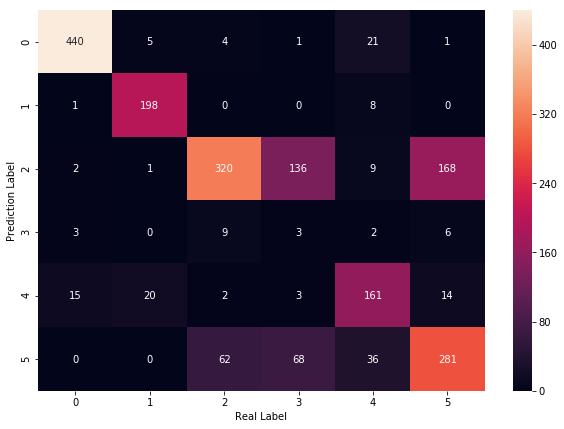

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()